In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
#讀取數據
(x_train,y_train),(x_test,y_test)=mnist.load_data()

#更改資料格式
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

#將數據歸一化
x_train=x_train/x_train.max()
x_test=x_test/x_test.max()

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

# 建立神經網路

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras import optimizers
from keras import losses

In [20]:
model=Sequential()
# input端
model.add(Dense(input_dim=784,units=784,activation='sigmoid'))

# hiddden layer
model.add(Dense(units=784,activation='sigmoid'))

# output端
model.add(Dense(units=10,activation='softmax'))

Adm=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, 
                epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss=losses.categorical_crossentropy,
              optimizer=Adm,metrics=['accuracy'])

# 開始訓練資料

In [21]:
model_train=model.fit(x_train,y_train,batch_size=100,epochs=30)

Epoch 1/30
60000/60000 [==============================] - 41s 675us/step - loss: 0.4479 - acc: 0.8647
Epoch 2/30
60000/60000 [==============================] - 42s 705us/step - loss: 0.1987 - acc: 0.9399
Epoch 3/30
60000/60000 [==============================] - 40s 670us/step - loss: 0.1369 - acc: 0.9582
Epoch 4/30
60000/60000 [==============================] - 40s 660us/step - loss: 0.0984 - acc: 0.9704
Epoch 5/30
60000/60000 [==============================] - 40s 673us/step - loss: 0.0735 - acc: 0.9774
Epoch 6/30
60000/60000 [==============================] - 40s 661us/step - loss: 0.0572 - acc: 0.9818
Epoch 7/30
60000/60000 [==============================] - 40s 666us/step - loss: 0.0458 - acc: 0.98520s - loss: 0.0458 - 
Epoch 8/30
60000/60000 [==============================] - 39s 658us/step - loss: 0.0345 - acc: 0.9893
Epoch 9/30
60000/60000 [==============================] - 40s 668us/step - loss: 0.0280 - acc: 0.9913
Epoch 10/30
60000/60000 [==============================] - 40s

Text(0.5,1,'epoch-acc')

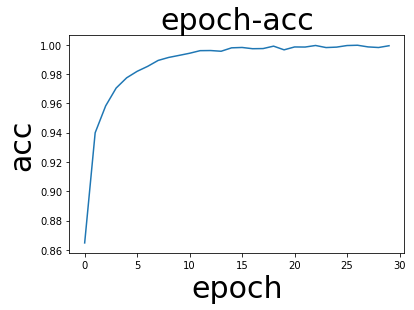

In [22]:
plt.plot(model_train.history["acc"])
plt.xlabel('epoch',size=30)
plt.ylabel('acc',size=30)
plt.title('epoch-acc',size=30)

# 利用testing data，檢驗測試結果

In [23]:
score=model.evaluate(x_test,y_test)
print('loss',score[0])
print('acc',score[1])

10000/10000 [==============================] - 4s 439us/step
loss 0.1060316990152567
acc 0.9813


In [30]:
predict=model.predict_classes(x_test)

In [33]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28),cmap='Greys')
    print('神經網路判斷為:',predict[測試編號])
    print('正確解答為:',y_test[測試編號])

In [34]:
interact (test,測試編號=(1,9999))

interactive(children=(IntSlider(value=5000, description='測試編號', max=9999, min=1), Output()), _dom_classes=('wi…

<function __main__.test(測試編號)>

# 儲存訓練結果

In [167]:
model.json=model.to_json()
open('98%_model.json','w').write(model.json)
model.save_weights('98%_model_weights.h5')